# DNN Meta-Estimator architecture and performance evaluation


## Load Data

In [1]:
import pandas as pd

from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

## Evaluate a Basic DNN Model

17:14:56 - Start training DNN


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,761 (85.00 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 448 (1.75 KB)

17:14:56 - Split 1/3
Epoch 1/50
8934/8934 - 7s - 814us/step - loss: 10.2593 - rmse: 3.0351 - val_loss: 4.8807 - val_rmse: 2.1792
Epoch 2/50
8934/8934 - 7s - 759us/step - loss: 5.6209 - rmse: 2.3379 - val_loss: 4.7270 - val_rmse: 2.1459
Epoch 3/50
8934/8934 - 6s - 651us/step - loss: 5.1104 - rmse: 2.2293 - val_loss: 4.8252 - val_rmse: 2.1682
Epoch 4/50
8934/8934 - 6s - 661us/step - loss: 4.9585 - rmse: 2.1952 - val_loss: 4.5725 - val_rmse: 2.1117
Epoch 5/50
8934/8934 - 7s - 775us/step - loss: 4.8888 - rmse: 2.1812 - val_loss: 4.6908 - val_rmse: 2.1381
Epoch 6/50
8934/8934 - 7s - 762us/step - loss: 4.8647 - rmse: 2.1755 - val_loss: 4.6258 - val_rmse: 2.1233
Epoch 7/50
8934/8934 - 6s - 648us/step - loss: 4.8628 - rmse: 2.1746 - val_loss: 4.5049 - val_rmse: 2.0950
Epoch 8/50
8934/8934 - 7s - 738us/step - loss: 4.8395 - rmse: 2.1701 - val_loss: 4.3898 - val_rmse: 2.0695
Epoch 9/50
8934/8934 - 7s - 750us/step - loss: 4.8217 - rmse: 2.1652 - val_loss: 4.3296 - val_rmse: 2.0545
Epoch 10/50
893

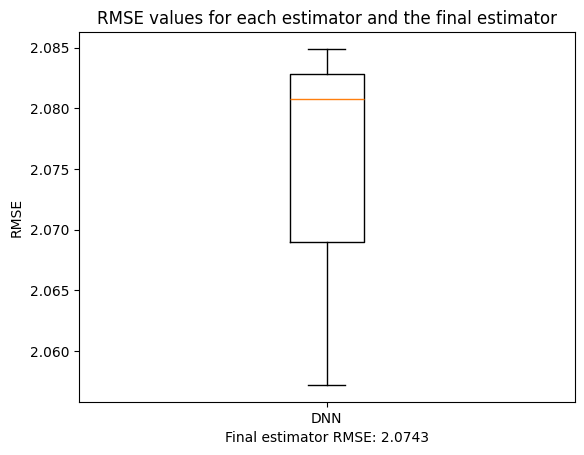

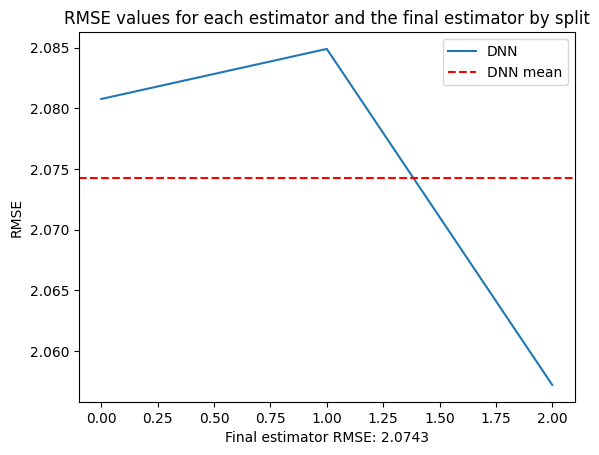

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Activation
from model_performance_calculations import calculate_dnn_performance, get_rmse_boxplot_chart, get_rmse_line_chart


def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


input_dim = X_train.shape[1]
model = Sequential([
    # Input Layer
    Input(shape=(input_dim,)),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Hidden Layer 1
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Hidden Layer 2    
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=[rmse])

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()


## Evaluate a DNN Model with Early Stopping

17:20:48 - Start training DNN


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,177 (258.50 KB)

 Trainable params: 65,217 (254.75 KB)

 Non-trainable params: 960 (3.75 KB)

17:20:48 - Split 1/3
Epoch 1/50
8934/8934 - 10s - 1ms/step - loss: 7.9451 - rmse: 2.6120 - val_loss: 4.7806 - val_rmse: 2.1433
Epoch 2/50
8934/8934 - 11s - 1ms/step - loss: 5.2803 - rmse: 2.2502 - val_loss: 4.5861 - val_rmse: 2.0910
Epoch 3/50
8934/8934 - 11s - 1ms/step - loss: 5.0824 - rmse: 2.2000 - val_loss: 4.5542 - val_rmse: 2.0798
Epoch 4/50
8934/8934 - 10s - 1ms/step - loss: 4.9804 - rmse: 2.1754 - val_loss: 4.5802 - val_rmse: 2.0830
Epoch 5/50
8934/8934 - 10s - 1ms/step - loss: 4.8921 - rmse: 2.1526 - val_loss: 4.5155 - val_rmse: 2.0664
Epoch 6/50
8934/8934 - 10s - 1ms/step - loss: 4.8211 - rmse: 2.1352 - val_loss: 4.4999 - val_rmse: 2.0608
Epoch 7/50
8934/8934 - 9s - 975us/step - loss: 4.7850 - rmse: 2.1246 - val_loss: 4.4190 - val_rmse: 2.0395
Epoch 8/50
8934/8934 - 9s - 976us/step - loss: 4.7367 - rmse: 2.1120 - val_loss: 4.4362 - val_rmse: 2.0426
Epoch 9/50
8934/8934 - 9s - 971us/step - loss: 4.7186 - rmse: 2.1071 - val_loss: 4.4231 - val_rmse: 2.0383
Epoch 10/50
8934/8934 

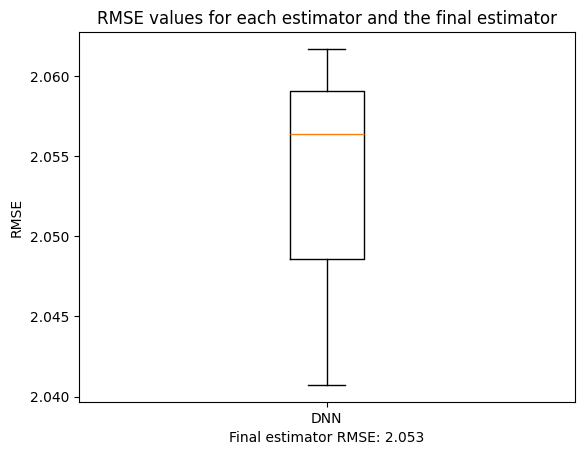

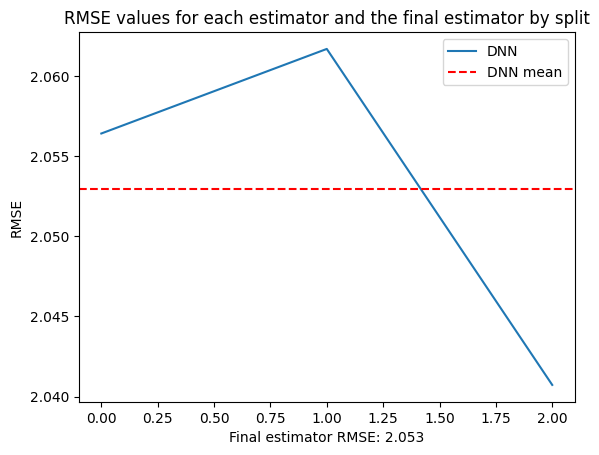

In [3]:
from tensorflow.keras import regularizers

input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=[rmse])
score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

## More improvements

17:30:13 - Start training DNN


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 192)            │        49,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,097 (422.25 KB)

 Trainable params: 106,753 (417.00 KB)

 Non-trainable params: 1,344 (5.25 KB)

17:30:13 - Split 1/3
Epoch 1/50
8934/8934 - 16s - 2ms/step - loss: 7.1610 - rmse: 2.4604 - val_loss: 5.2475 - val_rmse: 2.1592
Epoch 2/50
8934/8934 - 13s - 1ms/step - loss: 5.4724 - rmse: 2.2234 - val_loss: 5.4185 - val_rmse: 2.2181
Epoch 3/50
8934/8934 - 13s - 1ms/step - loss: 5.2583 - rmse: 2.1865 - val_loss: 4.9312 - val_rmse: 2.1181
Epoch 4/50
8934/8934 - 13s - 1ms/step - loss: 5.1459 - rmse: 2.1666 - val_loss: 4.9123 - val_rmse: 2.1185
Epoch 5/50
8934/8934 - 13s - 1ms/step - loss: 5.0898 - rmse: 2.1570 - val_loss: 5.0615 - val_rmse: 2.1521
Epoch 6/50
8934/8934 - 13s - 1ms/step - loss: 5.0503 - rmse: 2.1478 - val_loss: 5.0250 - val_rmse: 2.1451
Epoch 7/50
8934/8934 - 13s - 1ms/step - loss: 5.0352 - rmse: 2.1444 - val_loss: 4.7669 - val_rmse: 2.0857
Epoch 8/50
8934/8934 - 13s - 1ms/step - loss: 5.0068 - rmse: 2.1395 - val_loss: 4.7998 - val_rmse: 2.0936
Epoch 9/50
8934/8934 - 13s - 1ms/step - loss: 4.9816 - rmse: 2.1339 - val_loss: 4.9044 - val_rmse: 2.1201
Epoch 10/50
8934/8934 - 1

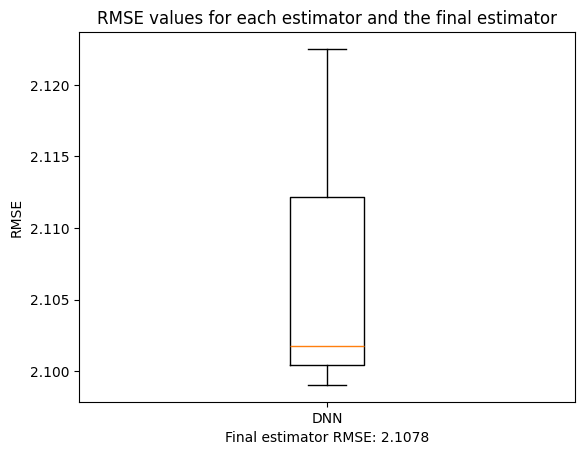

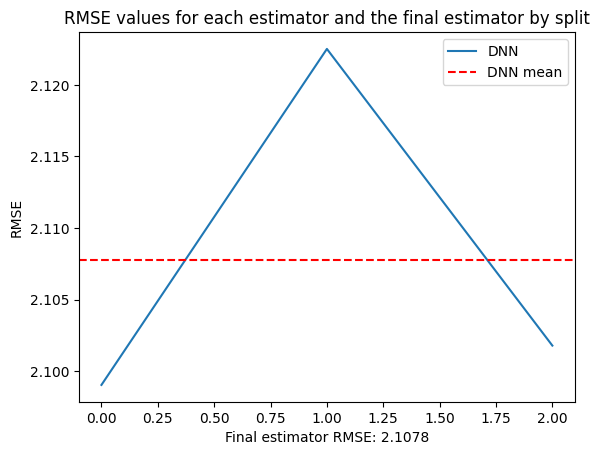

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU

input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),

    # Hidden Layers
    Dense(256, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.5),

    Dense(192, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.4),

    Dense(128, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.3),

    Dense(64, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),

    Dense(32, kernel_regularizer=regularizers.l2(1e-3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.1),

    # Output Layer
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

## Simple and wide model

17:44:29 - Start training DNN


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

17:44:29 - Split 1/3
Epoch 1/50
8934/8934 - 4s - 497us/step - loss: 6.2923 - rmse: 2.4208 - val_loss: 4.6792 - val_rmse: 2.1261
Epoch 2/50
8934/8934 - 4s - 439us/step - loss: 4.7875 - rmse: 2.1486 - val_loss: 4.4351 - val_rmse: 2.0718
Epoch 3/50
8934/8934 - 4s - 440us/step - loss: 4.5028 - rmse: 2.0834 - val_loss: 4.6100 - val_rmse: 2.1109
Epoch 4/50
8934/8934 - 4s - 439us/step - loss: 4.3551 - rmse: 2.0476 - val_loss: 4.5520 - val_rmse: 2.0953
Epoch 5/50
8934/8934 - 4s - 442us/step - loss: 4.2850 - rmse: 2.0289 - val_loss: 4.3724 - val_rmse: 2.0513
Epoch 6/50
8934/8934 - 4s - 440us/step - loss: 4.2242 - rmse: 2.0140 - val_loss: 4.2870 - val_rmse: 2.0297
Epoch 7/50
8934/8934 - 4s - 441us/step - loss: 4.1990 - rmse: 2.0074 - val_loss: 4.3323 - val_rmse: 2.0392
Epoch 8/50
8934/8934 - 4s - 441us/step - loss: 4.1927 - rmse: 2.0049 - val_loss: 4.3273 - val_rmse: 2.0376
Epoch 9/50
8934/8934 - 4s - 438us/step - loss: 4.1850 - rmse: 2.0016 - val_loss: 4.3045 - val_rmse: 2.0318
Epoch 10/50
8934

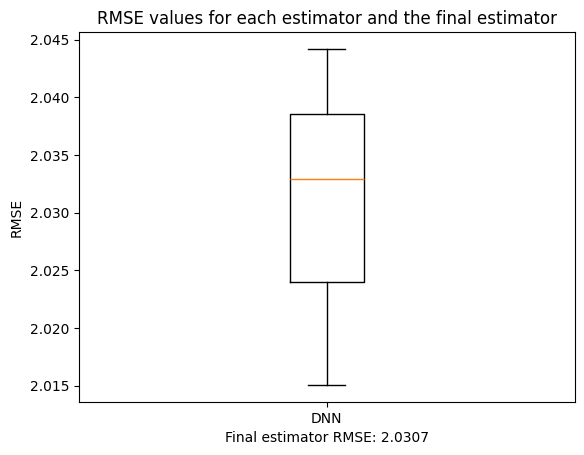

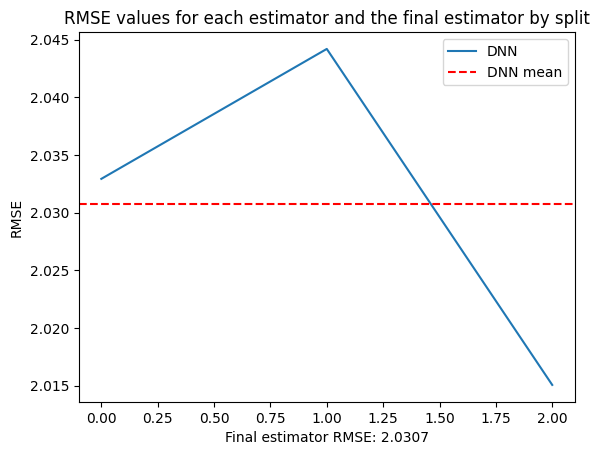

In [5]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

## Shallow with Feature Compression

21:01:27 - Start training DNN


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,745 (30.25 KB)

 Trainable params: 7,553 (29.50 KB)

 Non-trainable params: 192 (768.00 B)

21:01:27 - Split 1/3
Epoch 1/50
8934/8934 - 5s - 612us/step - loss: 8.2375 - rmse: 2.6723 - val_loss: 4.6844 - val_rmse: 2.1322
Epoch 2/50
8934/8934 - 5s - 509us/step - loss: 5.3205 - rmse: 2.2717 - val_loss: 4.7058 - val_rmse: 2.1347
Epoch 3/50
8934/8934 - 4s - 468us/step - loss: 5.0585 - rmse: 2.2127 - val_loss: 4.4328 - val_rmse: 2.0688
Epoch 4/50
8934/8934 - 4s - 503us/step - loss: 4.8957 - rmse: 2.1750 - val_loss: 4.3611 - val_rmse: 2.0523
Epoch 5/50
8934/8934 - 5s - 552us/step - loss: 4.7662 - rmse: 2.1445 - val_loss: 4.3781 - val_rmse: 2.0542
Epoch 6/50
8934/8934 - 4s - 461us/step - loss: 4.7006 - rmse: 2.1282 - val_loss: 4.3321 - val_rmse: 2.0441
Epoch 7/50
8934/8934 - 5s - 525us/step - loss: 4.6402 - rmse: 2.1143 - val_loss: 4.3108 - val_rmse: 2.0375
Epoch 8/50
8934/8934 - 4s - 447us/step - loss: 4.5925 - rmse: 2.1018 - val_loss: 4.2805 - val_rmse: 2.0294
Epoch 9/50
8934/8934 - 4s - 451us/step - loss: 4.5841 - rmse: 2.0996 - val_loss: 4.3398 - val_rmse: 2.0441
Epoch 10/50
8934

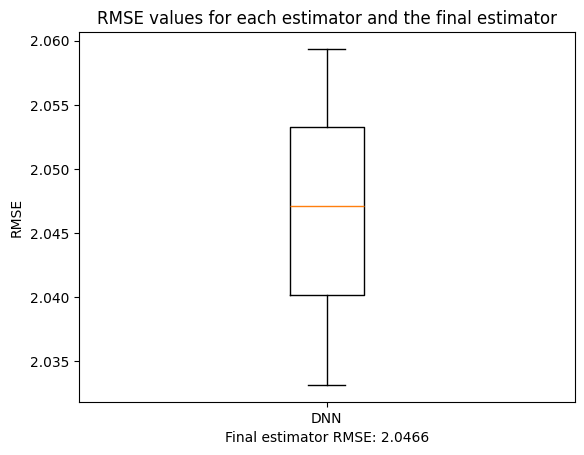

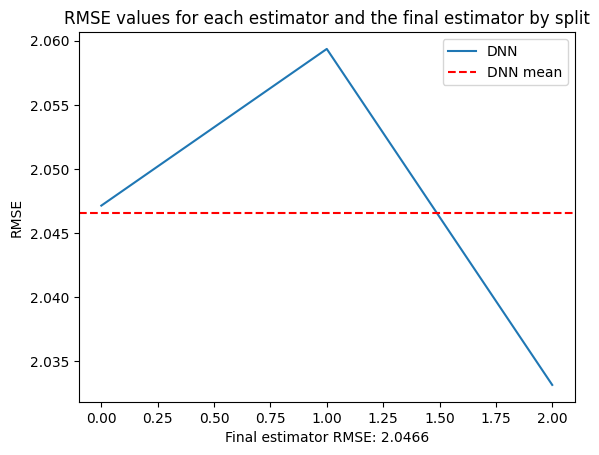

In [7]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

### Deeper Network with Gradual Reduction

21:05:15 - Start training DNN


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │        20,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 65,729 (256.75 KB)

 Non-trainable params: 960 (3.75 KB)

21:05:15 - Split 1/3
Epoch 1/50
8934/8934 - 13s - 1ms/step - loss: 8.7782 - rmse: 2.8376 - val_loss: 5.1989 - val_rmse: 2.2355
Epoch 2/50
8934/8934 - 10s - 1ms/step - loss: 5.6279 - rmse: 2.3229 - val_loss: 4.5616 - val_rmse: 2.0873
Epoch 3/50
8934/8934 - 11s - 1ms/step - loss: 5.1907 - rmse: 2.2241 - val_loss: 4.8441 - val_rmse: 2.1492
Epoch 4/50
8934/8934 - 12s - 1ms/step - loss: 4.9783 - rmse: 2.1736 - val_loss: 4.5005 - val_rmse: 2.0651
Epoch 5/50
8934/8934 - 12s - 1ms/step - loss: 4.8654 - rmse: 2.1461 - val_loss: 4.5676 - val_rmse: 2.0781
Epoch 6/50
8934/8934 - 11s - 1ms/step - loss: 4.8151 - rmse: 2.1327 - val_loss: 4.5785 - val_rmse: 2.0782
Epoch 7/50
8934/8934 - 13s - 1ms/step - loss: 4.7930 - rmse: 2.1246 - val_loss: 4.6062 - val_rmse: 2.0823
Epoch 8/50
8934/8934 - 12s - 1ms/step - loss: 4.7782 - rmse: 2.1200 - val_loss: 4.5888 - val_rmse: 2.0771
Epoch 9/50
8934/8934 - 17s - 2ms/step - loss: 4.7636 - rmse: 2.1148 - val_loss: 4.5286 - val_rmse: 2.0617
Epoch 10/50
8934/8934 - 1

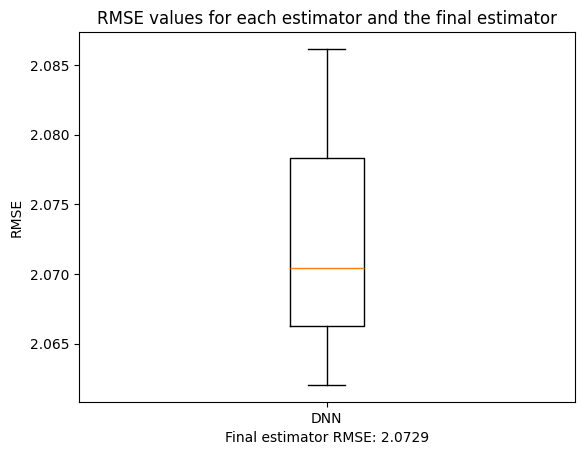

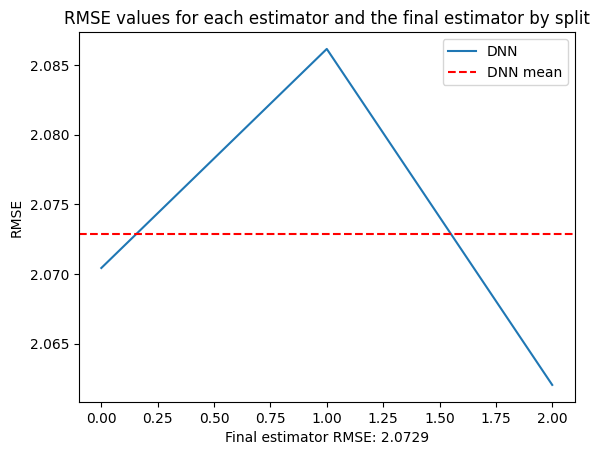

In [8]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),

    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

### Deep Narrow Network

21:35:25 - Start training DNN


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 48)             │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,057 (43.19 KB)

 Trainable params: 10,769 (42.07 KB)

 Non-trainable params: 288 (1.12 KB)

21:35:25 - Split 1/3
Epoch 1/50
8934/8934 - 31s - 4ms/step - loss: 7.8963 - rmse: 2.7171 - val_loss: 4.8431 - val_rmse: 2.1672
Epoch 2/50
8934/8934 - 28s - 3ms/step - loss: 5.4589 - rmse: 2.2987 - val_loss: 4.8212 - val_rmse: 2.1611
Epoch 3/50
8934/8934 - 28s - 3ms/step - loss: 5.0603 - rmse: 2.2100 - val_loss: 4.4466 - val_rmse: 2.0695
Epoch 4/50
8934/8934 - 29s - 3ms/step - loss: 4.8621 - rmse: 2.1652 - val_loss: 4.4310 - val_rmse: 2.0623
Epoch 5/50
8934/8934 - 29s - 3ms/step - loss: 4.7408 - rmse: 2.1360 - val_loss: 4.3831 - val_rmse: 2.0539
Epoch 6/50
8934/8934 - 28s - 3ms/step - loss: 4.7137 - rmse: 2.1294 - val_loss: 4.4351 - val_rmse: 2.0658
Epoch 7/50
8934/8934 - 26s - 3ms/step - loss: 4.6834 - rmse: 2.1216 - val_loss: 4.3828 - val_rmse: 2.0518
Epoch 8/50
8934/8934 - 24s - 3ms/step - loss: 4.6497 - rmse: 2.1127 - val_loss: 4.5300 - val_rmse: 2.0855
Epoch 9/50
8934/8934 - 27s - 3ms/step - loss: 4.6333 - rmse: 2.1077 - val_loss: 4.4498 - val_rmse: 2.0667
Epoch 10/50
8934/8934 - 2

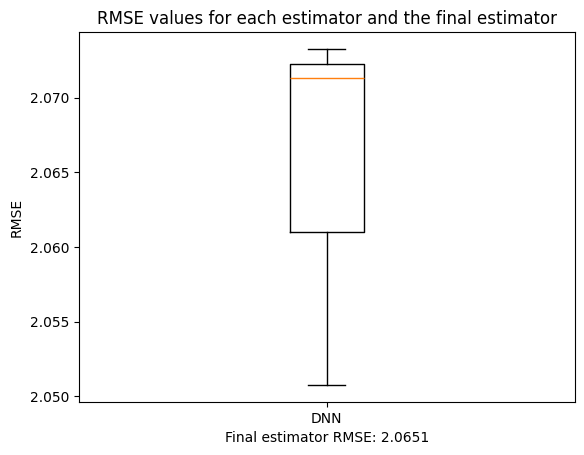

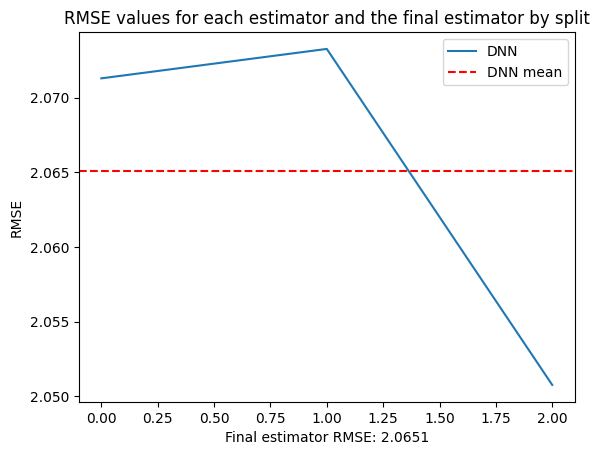

In [9]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(48, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.2),

    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

### Dense Bottleneck Layer

21:57:58 - Start training DNN


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,545 (56.82 KB)

 Trainable params: 14,129 (55.19 KB)

 Non-trainable params: 416 (1.62 KB)

21:57:58 - Split 1/3
Epoch 1/50
8934/8934 - 23s - 3ms/step - loss: 7.3864 - rmse: 2.5444 - val_loss: 4.9256 - val_rmse: 2.1828
Epoch 2/50
8934/8934 - 20s - 2ms/step - loss: 5.0749 - rmse: 2.2160 - val_loss: 4.5516 - val_rmse: 2.0963
Epoch 3/50
8934/8934 - 25s - 3ms/step - loss: 4.9237 - rmse: 2.1808 - val_loss: 4.5568 - val_rmse: 2.0978
Epoch 4/50
8934/8934 - 21s - 2ms/step - loss: 4.8301 - rmse: 2.1577 - val_loss: 4.4232 - val_rmse: 2.0642
Epoch 5/50
8934/8934 - 50s - 6ms/step - loss: 4.7736 - rmse: 2.1432 - val_loss: 4.5296 - val_rmse: 2.0879
Epoch 6/50
8934/8934 - 41s - 5ms/step - loss: 4.7374 - rmse: 2.1330 - val_loss: 4.4971 - val_rmse: 2.0777
Epoch 7/50
8934/8934 - 36s - 4ms/step - loss: 4.7049 - rmse: 2.1243 - val_loss: 4.5975 - val_rmse: 2.0824
Epoch 8/50
8934/8934 - 26s - 3ms/step - loss: 4.6537 - rmse: 2.1114 - val_loss: 4.4054 - val_rmse: 2.0536
Epoch 9/50
8934/8934 - 27s - 3ms/step - loss: 4.6449 - rmse: 2.1085 - val_loss: 4.5592 - val_rmse: 2.0901
Epoch 10/50
8934/8934 - 2

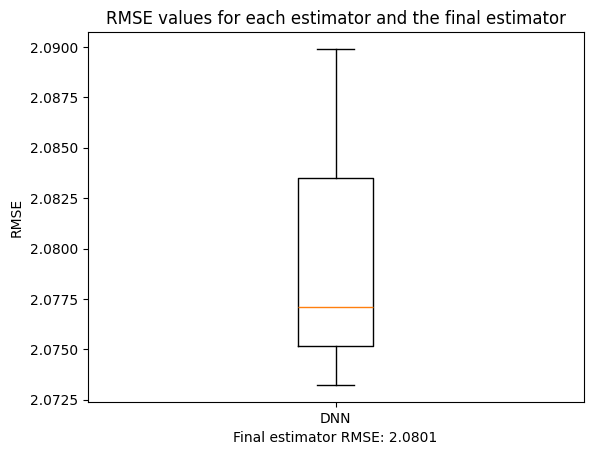

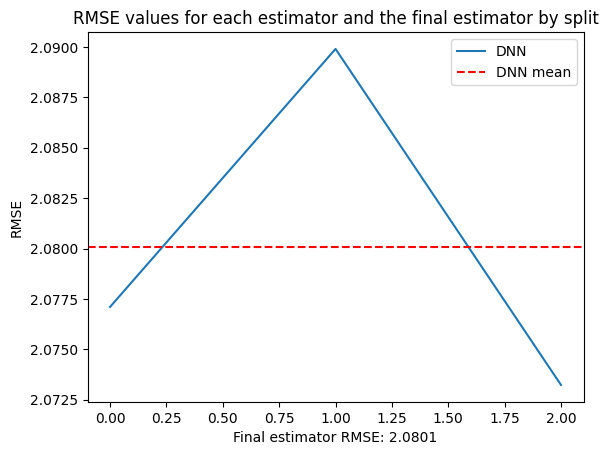

In [10]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),  # Bottleneck
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

### Wider Network (No Gradual Reduction)

22:21:55 - Start training DNN


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,185 (176.50 KB)

 Trainable params: 44,417 (173.50 KB)

 Non-trainable params: 768 (3.00 KB)

22:21:55 - Split 1/3
Epoch 1/50
8934/8934 - 30s - 3ms/step - loss: 7.4047 - rmse: 2.5661 - val_loss: 4.6036 - val_rmse: 2.1060
Epoch 2/50
8934/8934 - 28s - 3ms/step - loss: 5.0969 - rmse: 2.2141 - val_loss: 4.7258 - val_rmse: 2.1289
Epoch 3/50
8934/8934 - 28s - 3ms/step - loss: 4.9149 - rmse: 2.1694 - val_loss: 4.4302 - val_rmse: 2.0569
Epoch 4/50
8934/8934 - 27s - 3ms/step - loss: 4.8366 - rmse: 2.1481 - val_loss: 4.4285 - val_rmse: 2.0519
Epoch 5/50
8934/8934 - 37s - 4ms/step - loss: 4.7533 - rmse: 2.1269 - val_loss: 4.4348 - val_rmse: 2.0498
Epoch 6/50
8934/8934 - 40s - 5ms/step - loss: 4.7263 - rmse: 2.1196 - val_loss: 4.4186 - val_rmse: 2.0492
Epoch 7/50
8934/8934 - 39s - 4ms/step - loss: 4.6884 - rmse: 2.1092 - val_loss: 4.4111 - val_rmse: 2.0434
Epoch 8/50
8934/8934 - 39s - 4ms/step - loss: 4.6383 - rmse: 2.0972 - val_loss: 4.3304 - val_rmse: 2.0234
Epoch 9/50
8934/8934 - 29s - 3ms/step - loss: 4.6165 - rmse: 2.0902 - val_loss: 4.3335 - val_rmse: 2.0242
Epoch 10/50
8934/8934 - 2

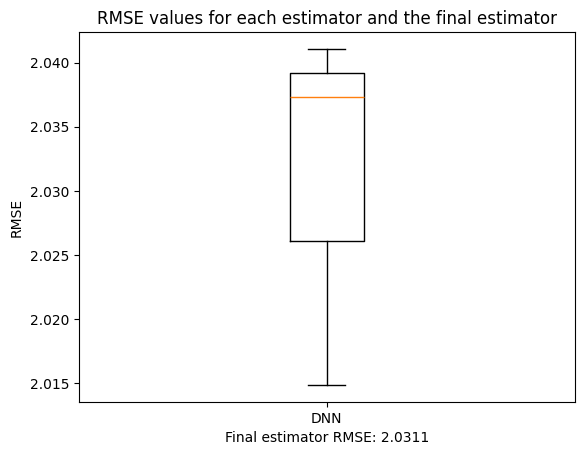

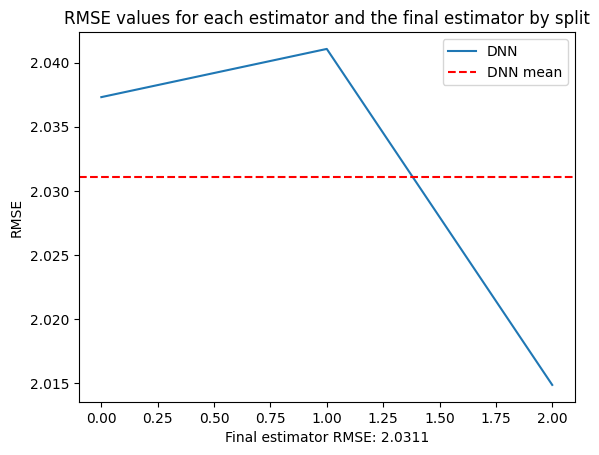

In [11]:
input_dim = X_train.shape[1]
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=[rmse]
)

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()

### Incorporate Feature Interaction (Wide & Deep)

22:48:27 - Start training DNN


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 81)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 128)       │     10,496 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 64)        │      8,256 │ dense_44[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 128)       │     10,496 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 32)        │      2,080 │ dense_45[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 160)       │          0 │ dense_43[0][0],   │
│ (Concatenate)       │                   │            │ dense_46[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 1)         │        161 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,489 (123.00 KB)

 Trainable params: 31,489 (123.00 KB)

 Non-trainable params: 0 (0.00 B)

22:48:27 - Split 1/3
Epoch 1/50
8934/8934 - 14s - 2ms/step - loss: 4.7696 - rmse: 2.0914 - val_loss: 4.4745 - val_rmse: 2.0886
Epoch 2/50
8934/8934 - 7s - 754us/step - loss: 4.0143 - rmse: 1.9726 - val_loss: 4.2103 - val_rmse: 2.0256
Epoch 3/50
8934/8934 - 15s - 2ms/step - loss: 3.9059 - rmse: 1.9457 - val_loss: 4.1955 - val_rmse: 2.0204
Epoch 4/50
8934/8934 - 15s - 2ms/step - loss: 3.8178 - rmse: 1.9234 - val_loss: 4.1304 - val_rmse: 2.0023
Epoch 5/50
8934/8934 - 16s - 2ms/step - loss: 3.7637 - rmse: 1.9068 - val_loss: 4.0970 - val_rmse: 1.9933
Epoch 6/50
8934/8934 - 16s - 2ms/step - loss: 3.6788 - rmse: 1.8887 - val_loss: 4.0455 - val_rmse: 1.9778
Epoch 7/50
8934/8934 - 15s - 2ms/step - loss: 3.6488 - rmse: 1.8794 - val_loss: 3.9693 - val_rmse: 1.9642
Epoch 8/50
8934/8934 - 10s - 1ms/step - loss: 3.5896 - rmse: 1.8655 - val_loss: 3.9824 - val_rmse: 1.9653
Epoch 9/50
8934/8934 - 5s - 551us/step - loss: 3.5506 - rmse: 1.8535 - val_loss: 3.9683 - val_rmse: 1.9634
Epoch 10/50
8934/8934 -

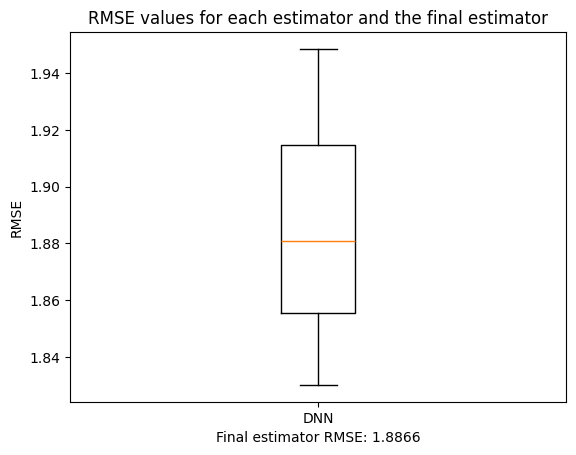

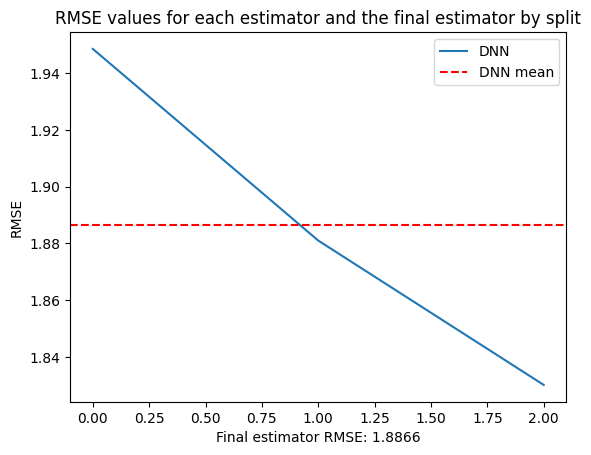

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate


def get_dnn_model(input_dimension: int):
    input_layer = Input(shape=(input_dimension,))
    wide = Dense(128, activation='relu')(input_layer)  # Wide component
    deep = Dense(128, activation='relu')(input_layer)
    deep = Dense(64, activation='relu')(deep)
    deep = Dense(32, activation='relu')(deep)

    merged = Concatenate()([wide, deep])
    output_layer = Dense(1, activation='linear')(merged)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse',
        metrics=[rmse]
    )

    return model


dnn_model = get_dnn_model(X_train.shape[1])

score = calculate_dnn_performance(model, X_train, y_train, X_additional_train, y_additional_train, n_splits=3, epochs=50)
get_rmse_boxplot_chart(score).show()
get_rmse_line_chart(score).show()